In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
from gensim.models import Word2Vec
import gensim 

from  nltk import FreqDist

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import Counter

In [3]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
genesis_ic = wn.ic(genesis, False, 0.0)
import re
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
from random import randint
import string
from sklearn.cluster import KMeans

In [4]:
#read in one dataset
df=pd.read_csv('epicurious')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 12 columns):
Unnamed: 0     20130 non-null int64
calories       15976 non-null float64
categories     20111 non-null object
date           20111 non-null object
desc           13495 non-null object
directions     20111 non-null object
fat            15908 non-null float64
ingredients    20111 non-null object
protein        15929 non-null float64
rating         20100 non-null float64
sodium         15974 non-null float64
title          20111 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [16]:
df=df[['categories','directions','ingredients','title']]

In [5]:
df=df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20111 entries, 0 to 20129
Data columns (total 4 columns):
categories     20111 non-null object
directions     20111 non-null object
ingredients    20111 non-null object
title          20111 non-null object
dtypes: object(4)
memory usage: 785.6+ KB


In [10]:
df.ingredients.head(10)

0    ['4 cups low-sodium vegetable or chicken stock...
1    ['1 1/2 cups whipping cream', '2 medium onions...
2    ['1 fennel bulb (sometimes called anise), stal...
3    ['2 tablespoons extra-virgin olive oil', '1 cu...
4    ['1 12-ounce package frozen spinach soufflé, t...
5    ['2 1/2 cups (lightly packed) fresh basil leav...
6    ['1 1/2 pounds small red-skinned potatoes, eac...
7    ['6 tablespoons granulated sugar', '1 1/2 tabl...
8    ['1/4 cup soy sauce', '1 tablespoon sugar', '2...
9    ['6 long parsley sprigs, divided', '1 3/4 cups...
Name: ingredients, dtype: object

In [6]:
df=df.reset_index(drop=True)

In [7]:
df['desc']

0        This uses the same ingredients found in boudin...
1        This recipe can be prepared in 45 minutes or l...
2                                                  Bulgogi
3        Transform your picnic into un pique-nique to r...
4        Simmering the yams fills them with flavor and ...
5        This cake is perfect for beginners—it's moist,...
6        This recipe can be prepared in 45 minutes or l...
7        Where a chutney and mustard sauce overlap. Cho...
8        This uncooked soup isn't for the timid — raw g...
9        Classic spoon bread is a savory pudding served...
10       Pork all over Denmark is hauntingly tender. Ru...
11       A springy take on Niçoise salad, with radishes...
12             Active time: 20 min Start to finish: 20 min
13       The glories of summer are captured in this pal...
14       Use a V-slicer (a simple, inexpensive version ...
15       Here's a terrific light version of an American...
16       Don't be surprised if these spears prove even .

In [22]:
df.head()

categories  \
0  ['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turke...   
1  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
2  ['Soup/Stew', 'Dairy', 'Potato', 'Vegetable', ...   
3  ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...   
4  ['Cheese', 'Dairy', 'Pasta', 'Vegetable', 'Sid...   

                                          directions  \
0  ['1. Place the stock, lentils, celery, carrot,...   
1  ['Combine first 9 ingredients in heavy medium ...   
2  ['In a large heavy saucepan cook diced fennel ...   
3  ['Heat oil in heavy large skillet over medium-...   
4  ['Preheat oven to 350°F. Lightly grease 8x8x2-...   

                                         ingredients  \
0  ['4 cups low-sodium vegetable or chicken stock...   
1  ['1 1/2 cups whipping cream', '2 medium onions...   
2  ['1 fennel bulb (sometimes called anise), stal...   
3  ['2 tablespoons extra-virgin olive oil', '1 cu...   
4  ['1 12-ounce package frozen spinach soufflé, t...   

                                         title  
0              Lentil, Apple, and Turkey Wrap   
1  Boudin Blanc Terrine with Red Onion Confit   
2                Potato and Fennel Soup Hodge   
3             Mahi-Mahi in Tomato Olive Sauce   
4                    Spinach Noodle Casserole

In [24]:
df['description_token']=df['desc'].apply(lambda x: process_article(x))

In [82]:
model_desc = Word2Vec(df['processed_titles'], min_count=1)

In [121]:
food_list=['the burgers were']

In [126]:

geni=model_desc.predict_output_word(food_list[-1])
food_list.append(geni[0][0])

In [127]:
geni

[('wasabi-avocado', 0.00021666358),
 ('chiffonade', 0.00021652464),
 ('orange-maple', 0.00021647813),
 ('strawberry-lemon', 0.00021633874),
 ('bakes', 0.00021625657),
 ('fennel-coconut', 0.00021611816),
 ('hot-honey', 0.0002161105),
 ('strawberry–pistachio', 0.00021608546),
 ('orange–brown', 0.00021600844),
 ('edamame', 0.00021598238)]

In [124]:
food_list

['the burgers were', 'wasabi-avocado']

In [46]:
# get stop words


stopwords_list = stopwords.words('english')

#add punctuation to stopwords list
stopwords_list += list(string.punctuation)

#add words that aren't in the NLTK stopwords list
stopwords_list += ['unsalted','grated','minced','ground','thinly','ounces','finely','black','red','white','plus','whole','coursely','cup','kosher','lb','oz','diced','sliced','pitted','peeled','seasoned','teaspoon','teaspoons','tablespoons', 'tablespoon', 'pound','cups','half','salt','pepper','chopped','bowl','directions','preheat','pieces','sliced','fresh','freshly','bunch','cut']
stopwords_list+=['``',"'s","''",'drained','baking','coarsely','stick','green','packed','all-purpose','room','temperature','1/2-inch','''''','pounds','dry','divided','halved','trimmed','slices','1/2-inch-thick','1/4-inch-thick','s','12','1','2','3','4','5','6','7','8','9','1/2','1/3','1/4','2/3','3/4','1/8','small','large','medium']

In [47]:
def process_article(article):
    tokens = word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list]
    return stopwords_removed 

In [163]:
#df['a'] = df['a'].apply(lambda x: x + 1)
df['Ingredient_join']=df['ingredients'].apply(lambda x:' '.join(x))
 
# df['ingredients'].astype(str).str.cat(df['ingredients'],sep=' ')

In [12]:
df['processed_titles']=df['title'].apply(lambda x: process_article(x))

In [13]:
df['title_join']=df['processed_titles'].apply(lambda x:' '.join(x))

In [16]:
df['processed_titles']

0             [boudin, blanc, terrine, red, onion, confit]
1                                        [the, best, blts]
2                                [korean, marinated, beef]
3        [ham, persillade, mustard, potato, salad, mash...
4                 [yams, braised, cream, rosemary, nutmeg]
5        [banana-chocolate, chip, cake, with, peanut, b...
6                       [beef, tenderloin, garlic, brandy]
7                                         [peach, mustard]
8                              [raw, cream, spinach, soup]
9                       [sweet, buttermilk, spoon, breads]
10                        [crisp, braised, pork, shoulder]
11       [tuna, asparagus, new, potato, salad, chive, v...
12       [asian, pear, watercress, salad, sesame, dress...
13                            [cucumber-basil, egg, salad]
14                                   [dried, pear, crisps]
15                            [apricot-cherry, shortcakes]
16       [roasted, sweet-potato, spears, bacon, vinaigr.

In [166]:
# this is the best format so far
df['processed_ingredients']=df['ingredients'].apply(lambda x: process_article(x))

In [167]:
df['ingredients_join']=df['processed_ingredients'].apply(lambda x:' '.join(x))

In [68]:
df['processed_directions']=df['directions'].apply(lambda x: process_article(x))

In [169]:
df['directions_join']=df['processed_directions'].apply(lambda x:' '.join(x))

In [170]:
# i think this is the tokenized directions
df['processed_directions'].head()

0    [place, stock, lentils, celery, carrot, thyme,...
1    ['combine, first, ingredients, heavy, saucepan...
2    ['in, heavy, saucepan, cook, fennel, onion, bu...
3    ['heat, oil, heavy, skillet, medium-high, heat...
4    ['preheat, oven, 350°f, lightly, grease, 8x8x2...
Name: processed_directions, dtype: object

In [171]:
df['recipe_combo']=df['processed_titles']+df['processed_ingredients']+df['processed_directions']

In [172]:
df['recipe_join']=df['recipe_combo'].apply(lambda x:' '.join(x))

In [173]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec

model_combo = Word2Vec(df['recipe_combo'], min_count=1)

In [174]:
test_run=df[df['ingredients'].str.contains('bread')]

In [175]:
test_run=test_run.reset_index(drop=True)

In [176]:
test_run

categories  \
0     ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
1     ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...   
2     ['Sandwich', 'Food Processor', 'Tomato', 'Kid-...   
3     ['Chicken', 'Bake', 'Low Fat', 'Kid-Friendly',...   
4     ['Milk/Cream', 'Cheese', 'Leafy Green', 'Pasta...   
5     ['Fish', 'Tomato', 'Quick & Easy', 'Summer', '...   
6     ['Chicken', 'Roast', 'High Fiber', 'Dinner', '...   
7     ['Condiment/Spread', 'Olive', 'Vegetable', 'Ro...   
8     ['Sandwich', 'Beef', 'Cheese', 'Leafy Green', ...   
9     ['Bread', 'Milk/Cream', 'Side', 'Bake', 'Veget...   
10                       ['Bread', 'Garlic', 'Gourmet']   
11    ['Side', 'Bake', 'Thanksgiving', 'Stuffing/Dre...   
12    ['30 Days of Groceries', 'Chickpea', 'Salad', ...   
13    ['Side', 'Bake', 'Thanksgiving', 'Stuffing/Dre...   
14    ['Food Processor', 'Pork', 'Shellfish', 'Appet...   
15    ['Salad', 'Sandwich', 'Vegetarian', 'Kid-Frien...   
16    ['Sandwich', 'Bean', 'Egg', 'Kid-Friendly', 'Q...   
17    ['Bean', 'Kid-Friendly', 'Dinner', 'Parmesan',...   
18    ['Bean', 'Kid-Friendly', 'Dinner', 'Ground Bee...   
19    ['Salad', 'Cheese', 'Tomato', 'Appetizer', 'Ve...   
20    ['Soup/Stew', 'Fruit Juice', 'Onion', 'Broil',...   
21    ['Tomato', 'Appetizer', 'Bake', 'Vegetarian', ...   
22    ['Milk/Cream', 'Dairy', 'Fruit', 'Dessert', 'V...   
23    ['Sandwich', 'Beef', 'Dinner', 'Lunch', 'Meat'...   
24    ['Sauté', 'Oscars', "Father's Day", 'Mayonnais...   
25    ['Food Processor', 'Mushroom', 'Bake', 'Cockta...   
26    ['Fruit', 'Pork', 'Breakfast', 'Brunch', 'Bake...   
27    ['Sauce', 'Quick & Easy', 'Mayonnaise', 'Lemon...   
28    ['Nut', 'Pork', 'Poultry', 'turkey', 'Roast', ...   
29    ['Sandwich', 'No-Cook', 'Kid-Friendly', 'Back ...   
...                                                 ...   
1595  ['Bean', 'Cheese', 'Fry', 'Cinco de Mayo', 'Di...   
1596  ['Food Processor', 'Shellfish', 'Bake', 'Low F...   
1597  ['Sandwich', 'Kid-Friendly', 'Quick & Easy', '...   
1598  ['Milk/Cream', 'Mushroom', 'Onion', 'Pasta', '...   
1599  ['Dairy', 'Egg', 'Breakfast', 'Brunch', 'Fry',...   
1600  ['Milk/Cream', 'Egg', 'Garlic', 'Mushroom', 't...   
1601  ['Sandwich', 'turkey', 'Low Fat', 'Grill/Barbe...   
1602  ['Condiment/Spread', 'Olive', 'Vegetarian', 'G...   
1603  ['Mixer', 'Chocolate', 'Dessert', 'Bake', 'Fre...   
1604  ['Leafy Green', 'Shellfish', 'Appetizer', 'Bra...   
1605  ['Bread', 'Potato', 'Side', 'HarperCollins', '...   
1606  ['Bread', 'Garlic', 'Side', 'Broil', 'Grill/Ba...   
1607  ['Salad', 'Egg', 'Fruit', 'Leafy Green', 'Herb...   
1608  ['Sandwich', 'Broil', 'Ham', 'Swiss Cheese', '...   
1609  ['Chicken', 'Garlic', 'Summer', 'Grill', 'Gril...   
1610  ['Salad', 'Food Processor', 'No-Cook', 'Picnic...   
1611  ['Fruit', 'Pork', 'Roast', 'Apricot', 'Pork Te...   
1612  ['Dairy', 'Pasta', 'Side', 'Bake', 'Vegetarian...   
1613  ['Sandwich', 'Egg', 'Vegetable', 'Quick & Easy...   
1614  ['Bake', 'Dinner', 'Ground Lamb', 'Eggplant', ...   
1615  ['Mustard', 'Olive', 'Bake', 'Parmesan', 'Rack...   
1616  ['Soup/Stew', 'Beef', 'Herb', 'Tomato', 'Veget...   
1617  ['Side', 'Bake', 'Thanksgiving', 'Stuffing/Dre...   
1618  ['Soup/Stew', 'Cheese', 'Potato', 'Vegetable',...   
1619  ['Garlic', 'Shellfish', 'Bake', 'Quick & Easy'...   
1620  ['Pasta', 'Pork', 'Tomato', 'Kid-Friendly', 'D...   
1621  ['Cake', 'Dessert', 'Bake', 'Cream Cheese', 'S...   
1622  ['Condiment/Spread', 'Herb', 'Nut', 'Winter', ...   
1623  ['Onion', 'Rice', 'Broil', 'Dinner', 'Sausage'...   
1624  ['Sandwich', 'Herb', 'Vegetable', 'Roast', 'Pi...   

                                             directions  \
0     ['Combine first 9 ingredients in heavy medium ...   
1     ['Heat oil in heavy large skillet over medium-...   
2     ['Mix basil, mayonnaise and butter in processo...   
3     ['Preheat oven to 400°F. In a shallow bowl, co...   
4     ['Heat oil in heavy large skillet over medium ...   
5     ['Working off heat, put 1 

In [186]:

item=randint(0,(len(test_run)-1))

In [187]:
item

1602

In [188]:
test_ingredients=test_run['processed_ingredients'][item]

In [189]:
test_ingredients

['stemmed',
 'dried',
 'calimyrna',
 'figs',
 'water',
 'kalamata',
 'olives',
 'brine-cured',
 'olives',
 'extra-virgin',
 'olive',
 'oil',
 'balsamic',
 'vinegar',
 'capers',
 'thyme',
 '5.5-ounce',
 'logs',
 'soft',
 'goat',
 'cheese',
 'montrachet',
 'crosswise',
 'rounds',
 'toasted',
 'walnuts',
 'toasted',
 'walnut',
 'halves',
 "'fresh",
 'thyme',
 'sprigs',
 'optional',
 "'assorted",
 'breads',
 'and/or',
 'crackers']

In [206]:
key=test_ingredients[3]

In [207]:
key

'figs'

In [208]:
test_run.iloc[item]

categories               ['Condiment/Spread', 'Olive', 'Vegetarian', 'G...
directions               ['Combine chopped figs and 1/3 cup water in he...
ingredients              ['1 cup chopped stemmed dried Calimyrna figs',...
title                            Fig and Walnut Tapenade with Goat Cheese 
Ingredient_join          [ ' 1   c u p   c h o p p e d   s t e m m e d ...
processed_titles                     [fig, walnut, tapenade, goat, cheese]
title_join                                 fig walnut tapenade goat cheese
processed_ingredients    [stemmed, dried, calimyrna, figs, water, kalam...
ingredients_join         stemmed dried calimyrna figs water kalamata ol...
processed_directions     ['combine, figs, water, heavy, saucepan, cook,...
directions_join          'combine figs water heavy saucepan cook medium...
recipe_combo             [fig, walnut, tapenade, goat, cheese, stemmed,...
recipe_join              fig walnut tapenade goat cheese stemmed dried ...
recipe_vector            

In [209]:
answer=model_combo.most_similar(positive=[test_ingredients[0]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [220]:
answer

[('shiitake', 0.7897230386734009),
 ('chanterelle', 0.7644816637039185),
 ("'24", 0.7545621991157532),
 ('crimini', 0.7515480518341064),
 ('portobello', 0.738608717918396),
 ("'15", 0.7305291891098022),
 ('mission', 0.7257733345031738),
 ('assorted', 0.7251917123794556),
 ("'20", 0.7210330367088318),
 ("'16", 0.7101205587387085)]

In [210]:
final=answer[0][0]

In [211]:
final

'shiitake'

In [222]:
similar_words=model_combo.most_similar(positive=[key])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [223]:
similar_words

[('apricots', 0.8121068477630615),
 ('mission', 0.8100147247314453),
 ('calimyrna', 0.775413990020752),
 ('cherries', 0.7329045534133911),
 ('prunes', 0.7194474935531616),
 ('cranberries', 0.6884511113166809),
 ('fruits', 0.6874048113822937),
 ('pears', 0.6626465916633606),
 ('currants', 0.6550229787826538),
 ('plums', 0.6388370990753174)]

In [224]:
similar_list=[]
words=[]
for word in range(1,len(similar_words)):
    similar_list.append(model_combo.similarity(similar_words[word][0], final))
    words.append(similar_words[word][0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


In [225]:
layered_relationships=dict(zip(words,similar_list))

In [226]:
layered_relationships

{'mission': 0.539989,
 'calimyrna': 0.50027066,
 'cherries': 0.07481407,
 'prunes': 0.24062696,
 'cranberries': 0.13847882,
 'fruits': 0.05443571,
 'pears': 0.033408042,
 'currants': 0.20252141,
 'plums': -0.016005967}

In [227]:
final_2 = max(layered_relationships.keys(), key=(lambda k: layered_relationships[k]))

In [228]:
final_2

'mission'

In [229]:
test_run.iloc[item]['title'],test_run.iloc[item]['ingredients']

('Fig and Walnut Tapenade with Goat Cheese ',
 "['1 cup chopped stemmed dried Calimyrna figs', '1/3 cup water', '1/3 cup chopped pitted Kalamata olives or other brine-cured black olives', '2 tablespoons extra-virgin olive oil', '1 tablespoon balsamic vinegar', '1 tablespoon drained capers, chopped', '1 1/2 teaspoons chopped fresh thyme', '2 5.5-ounce logs soft fresh goat cheese (such as Montrachet), each cut crosswise into 1/2-inch-thick rounds', '1/2 cup chopped toasted walnuts', '1/4 cup toasted walnut halves', 'Fresh thyme sprigs (optional)', 'Assorted breads and/or crackers']")

In [230]:
key

'figs'

In [231]:
test_run.iloc[item]['title'].replace(key,final_2), test_run.iloc[item]['directions'].replace(key,final_2), test_run.iloc[item]['ingredients'].replace(key,final_2)

('Fig and Walnut Tapenade with Goat Cheese ',
 "['Combine chopped mission and 1/3 cup water in heavy medium saucepan. Cook over medium-high heat until liquid evaporates and mission are soft, about 7 minutes. Transfer to medium bowl. Mix in olives, olive oil, balsamic vinegar, capers, and chopped thyme. Season tapenade to taste with salt and pepper. (Can be made 3 days ahead. Cover and refrigerate. Bring to room temperature before serving.)', 'Arrange overlapping cheese rounds in circle in center of medium platter. Stir chopped walnuts into tapenade; spoon into center of cheese circle. Garnish with walnut halves and thyme sprigs, if desired. Serve with breads and/or crackers.']",
 "['1 cup chopped stemmed dried Calimyrna mission', '1/3 cup water', '1/3 cup chopped pitted Kalamata olives or other brine-cured black olives', '2 tablespoons extra-virgin olive oil', '1 tablespoon balsamic vinegar', '1 tablespoon drained capers, chopped', '1 1/2 teaspoons chopped fresh thyme', '2 5.5-ounce lo

In [64]:
rob=df['recipe_combo'].apply(lambda x: model_combo[x])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [232]:
df['title']

0                          Lentil, Apple, and Turkey Wrap 
1              Boudin Blanc Terrine with Red Onion Confit 
2                            Potato and Fennel Soup Hodge 
3                         Mahi-Mahi in Tomato Olive Sauce 
4                                Spinach Noodle Casserole 
5                                           The Best Blts 
6        Ham and Spring Vegetable Salad with Shallot Vi...
7                                    Spicy-Sweet Kumquats 
8                                   Korean Marinated Beef 
9        Ham Persillade with Mustard Potato Salad and M...
10           Yams Braised with Cream, Rosemary and Nutmeg 
11                                      Spicy Noodle Soup 
12       Banana-Chocolate Chip Cake With Peanut Butter ...
13                 Beef Tenderloin with Garlic and Brandy 
14                                          Peach Mustard 
15                              Raw Cream of Spinach Soup 
16                          Sweet Buttermilk Spoon Bread

In [147]:
np.array(rob).shape

(20111,)

In [71]:
food_test=['chicken','basil','parmesan','flour']

In [72]:
dinner=[]
for food in range(len(food_test)):
    dinner.append(model_combo[food_test[food]])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
food=sum(dinner)

In [74]:
df['recipe_vector']=df['recipe_combo'].apply(lambda x: sum(model_combo[x]))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [75]:
recipe=df[['title','recipe_vector']]

In [76]:
model_combo.doesnt_match('combine flour'.split())

model_combo.similar_by_word('sauce')

model_combo.predict_output_word(['chicken'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:876: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('breasts', 0.664642),
 ('broth', 0.13979365),
 ('stock', 0.0653187),
 ('thighs', 0.035518784),
 ('breast', 0.019364396),
 ('legs', 0.0133119505),
 ('wings', 0.0061221565),
 ('boneless', 0.0041845907),
 ('cutlets', 0.004074453),
 ('low-salt', 0.0026238984)]

In [264]:
food_list=['put']

In [268]:

geni=model_combo.predict_output_word(food_list[-1])
food_list.append(geni[1][0])

In [269]:
geni

[('a', 0.00018322212),
 ('``', 0.00010865021),
 ('preferably', 8.908149e-05),
 ('good', 8.7929366e-05),
 ('serving', 8.391124e-05),
 ("'equipment", 8.234379e-05),
 ('equipment', 7.625448e-05),
 ('thermometer', 7.603999e-05),
 ('special', 7.4787014e-05),
 ('info', 7.435482e-05)]

In [270]:
food_list

['put', 'thawed', '``']

In [77]:
def vector_shaper(col):
    test_cluster=[]
    for num in range(len(col)):
        test_cluster.append(col[num])
    return test_cluster

In [78]:
answer=vector_shaper(df['pca_vector'])

KeyError: 'pca_vector'

In [79]:
answer[0].shape

AttributeError: 'tuple' object has no attribute 'shape'

In [80]:
reshape_list=[]
for num in range(len(answer)):
    reshape_list.append(answer[num].reshape(1,-1))

AttributeError: 'tuple' object has no attribute 'reshape'

In [81]:
vector[6].reshape(-1,1).shape

NameError: name 'vector' is not defined

In [82]:
np.asarray(reshape_list).shape

(0,)

In [83]:
ar.shape

NameError: name 'ar' is not defined

In [1]:
test_cluster=[]
for num in range(len(recipe['recipe_vector'])):
    test_cluster.append(recipe['recipe_vector'][num])

NameError: name 'recipe' is not defined

In [85]:
from sklearn.decomposition.truncated_svd import TruncatedSVD        
pca = TruncatedSVD(n_components=1)                                
#X_reduced_train = pca.fit_transform(X) 

In [86]:
pca.fit_transform(vector)

NameError: name 'vector' is not defined

In [87]:
test_cluster[0].shape

(100,)

In [88]:
X=np.asarray(test_cluster)

In [89]:
X.shape

(20111, 100)

In [ ]:
vector=df['recipe_combo'].apply(lambda x: model_combo[x])

In [ ]:
df['pca_vector']=df['recipe_combo'].apply(lambda x: pca.fit_transform(model_combo[x]))

In [ ]:
#reshaping word lists

f=np.asarray(food).reshape(1,-1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['recipe_join'])

#vectorizer.get_feature_names()

X.toarray()

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)

num_clusters = 10 #Change it according to your data.
km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2, n_init = 1)
km.fit(tfidf)
clusters = km.labels_.tolist()

dict_={'text':df['title'], 'cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(dict_,index=[clusters], columns=['text','cluster']) # Converting it into a dataframe.

frame['cluster'].value_counts()

In [ ]:
frame['cluster']

In [92]:
def recipe_clusterer(num):
    k_means = KMeans(n_clusters = num)
    k_means.fit(X)
    y_hat = k_means.predict(X)
    cluster_numbers=[]
    for number in range(len(y_hat)):
        cluster_numbers.append(y_hat[number])
    recipe['clustered_groups']=pd.DataFrame(cluster_numbers)
    return recipe

In [124]:
recipe_clusterer(15)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


title  \
0                        Lentil, Apple, and Turkey Wrap    
1            Boudin Blanc Terrine with Red Onion Confit    
2                          Potato and Fennel Soup Hodge    
3                       Mahi-Mahi in Tomato Olive Sauce    
4                              Spinach Noodle Casserole    
5                                         The Best Blts    
6      Ham and Spring Vegetable Salad with Shallot Vi...   
7                                  Spicy-Sweet Kumquats    
8                                 Korean Marinated Beef    
9      Ham Persillade with Mustard Potato Salad and M...   
10         Yams Braised with Cream, Rosemary and Nutmeg    
11                                    Spicy Noodle Soup    
12     Banana-Chocolate Chip Cake With Peanut Butter ...   
13               Beef Tenderloin with Garlic and Brandy    
14                                        Peach Mustard    
15                            Raw Cream of Spinach Soup    
16                        Sweet Buttermilk Spoon Breads    
17                          Crisp Braised Pork Shoulder    
18     Mozzarella-Topped Peppers with Tomatoes and Ga...   
19     Tuna, Asparagus, and New Potato Salad with Chi...   
20     Asian Pear and Watercress Salad with Sesame Dr...   
21                                      "Fried" Chicken    
22     Fish Fillets in Parchment with Asparagus and O...   
23           Pancetta and Taleggio Lasagna with Treviso    
24                              Sea Salt-Roasted Pecans    
25                               Garlic Baguette Crumbs    
26                             Cucumber-Basil Egg Salad    
27                                    Dried Pear Crisps    
28     Green Bean, Red Onion, and Roast Potato Salad ...   
29                            Apricot-Cherry Shortcakes    
...                                                  ...   
20081                            Mussels in Cream Sauce    
20082  Roasted and Raw Carrot Salad with Avocado and ...   
20083                Cabbage Soup with Apples and Thyme    
20084           Goat Cheese-Onion Naan with Mango Salsa    
20085             Spinach with Chickpeas and Fried Eggs    
20086  Grilled Fillet of Beef with Tomato Ginger Vina...   
20087                         Roasted Red Pepper Butter    
20088                       White Miso Peach/Pear/Apple    
20089                  Lemon and Rosemary T-Bone Steaks    
20090                 3-Ingredient Caramel-Pear Galette    
20091                                 4-3-2-1 Spice Rub    
20092                                Saffron Mayonnaise    
20093  Potato Galettes with Crab, Shrimp, and Asparagus    
20094  Herbed Goat Cheese and Roasted-Vegetable Sandw...   
20095                               Maple Old-Fashioned    
20096                                           Russian    
20097                Shellfish Chowder with Fresh Thyme    
20098                                 Cauliflower Purée    
20099                     Bacon-Wrapped Maple Pork Loin    
20100                 Chicken with White Wine and Herbs    
20101                                        Date Purée    
20102  Crispy Salt and Pepper Chicken with Caramelize...   
20103                                       Orange-Tini    
20104                                 Blueberry Compote    
20105                       Chinese Barbecued Spareribs    
20106                                    Parmesan Puffs    
20107                    Artichoke and Parmesan Risotto    
20108                             Turkey Cream Puff Pie    
20109           Snapper on Angel Hair with Citrus Cream    
20110        Baked Ham with Marmalade-Horseradish Glaze    

                                           recipe_vector  clustered_groups  
0      [35.415123, -121.24619, -22.433096, -9.875012,...                 1  
1      [132.22688, -182.9189, -15.198818, 16.782574, ...                14  
2      [51.121754, -140.36613, 0.12203795, -1.9625912...                 3  
3      [75.93198, -82.

In [125]:
def word_clouder(num):
    test_word=''
    group=recipe[recipe['clustered_groups']==num]['title']
    processed_words=group.apply(lambda x: process_article(x))
    articles_concat = []
    for article in processed_words:
        articles_concat += article
        word_list=Counter(articles_concat).most_common(100)
    
    for word in articles_concat:
        test_word+=' '
        test_word+=word
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(test_word)

# Display the generated image:
    plt.figure(figsize=[20,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


    return plt.show()

In [121]:
import time

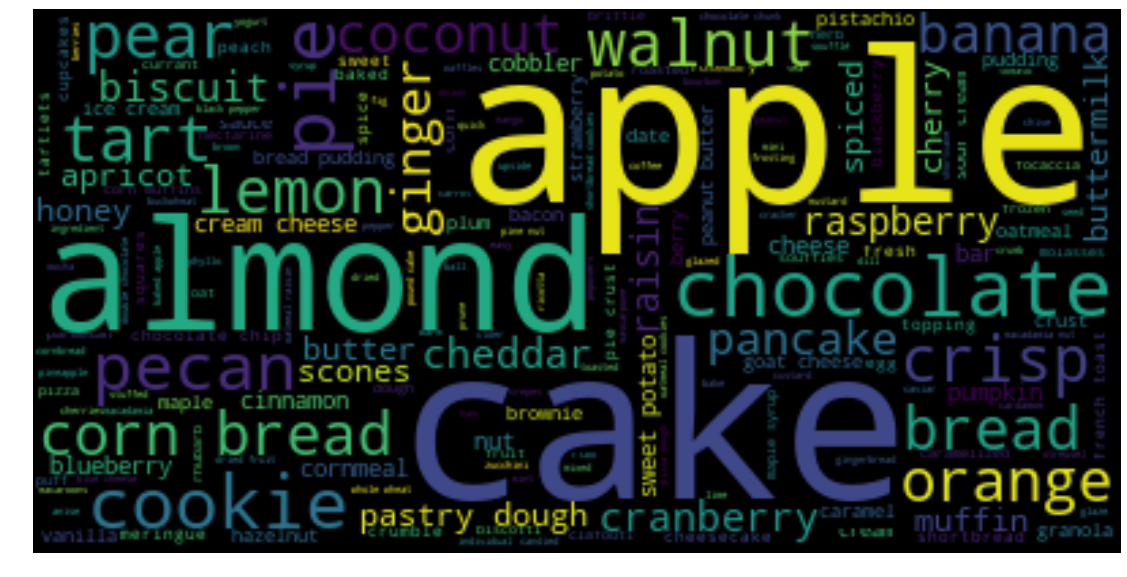

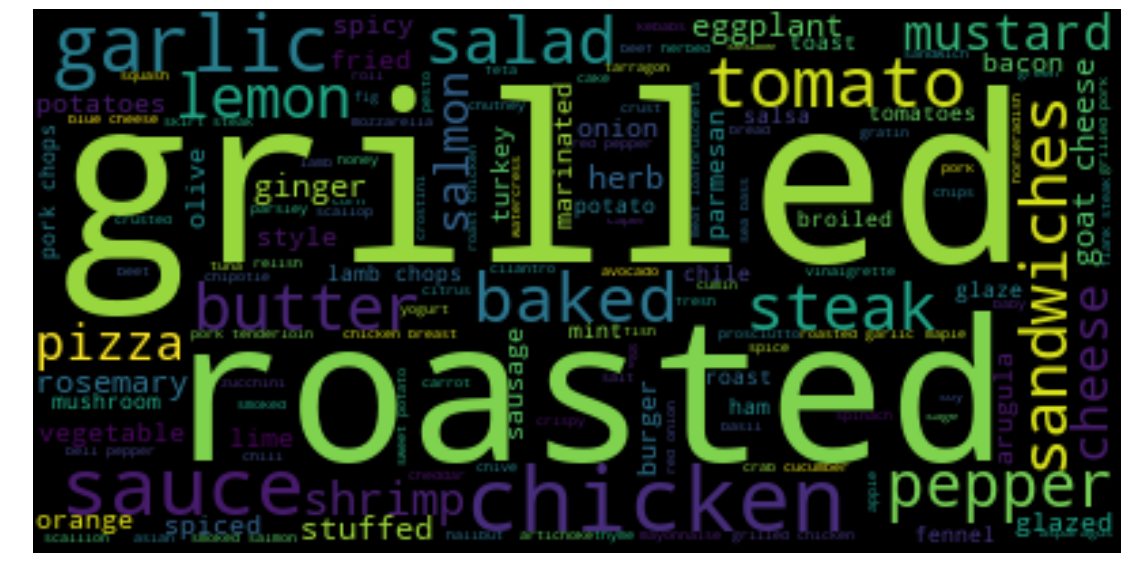

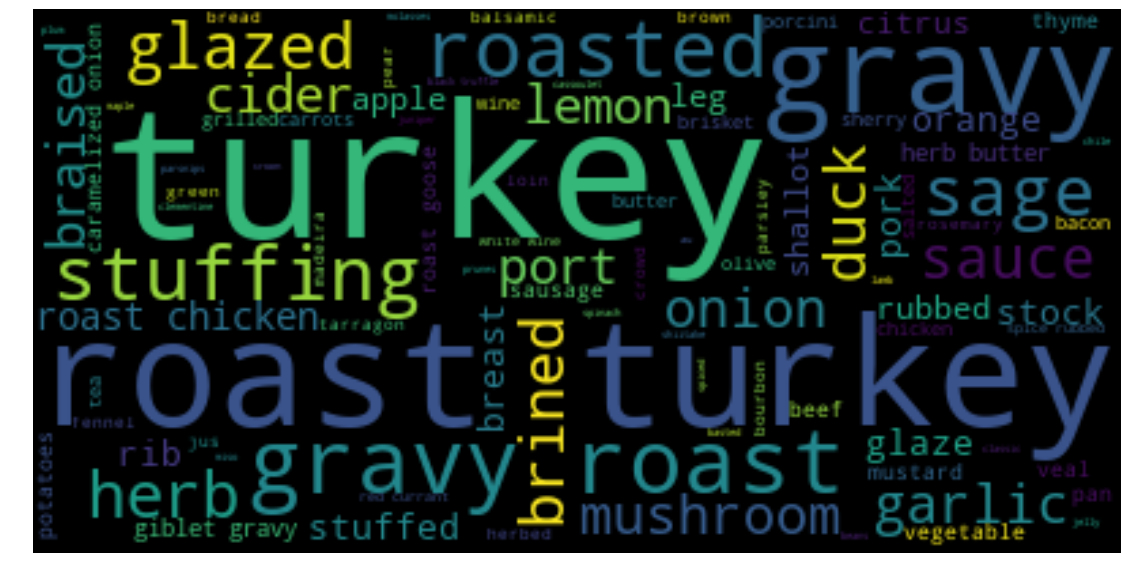

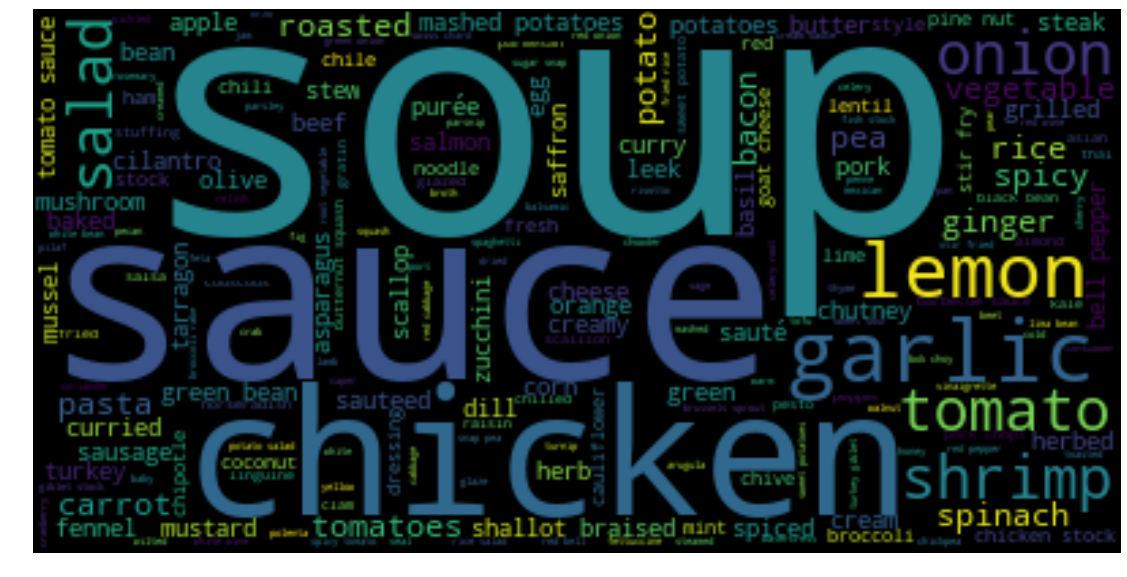

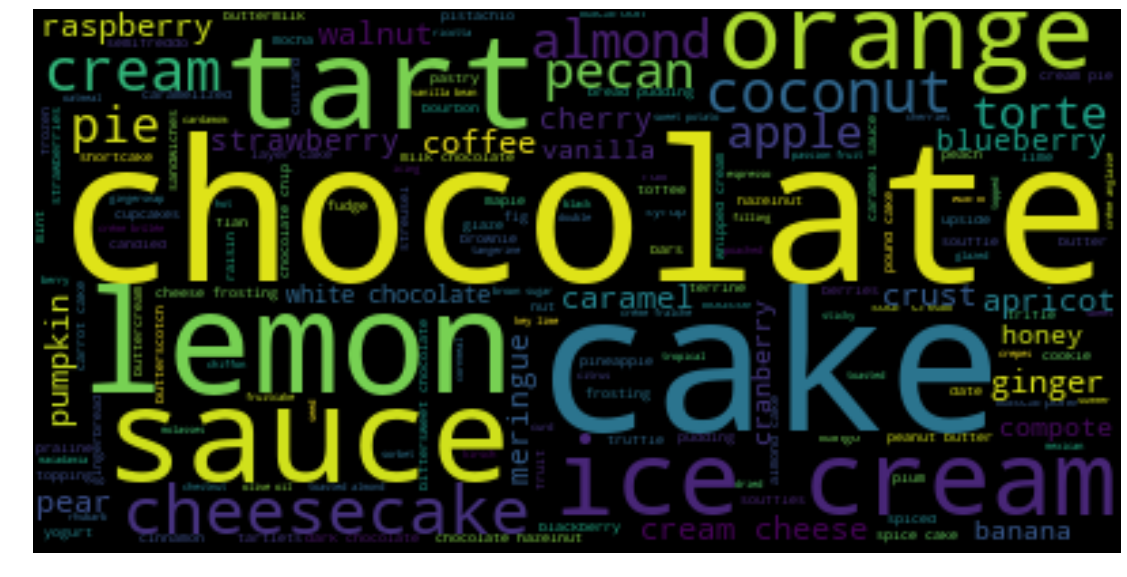

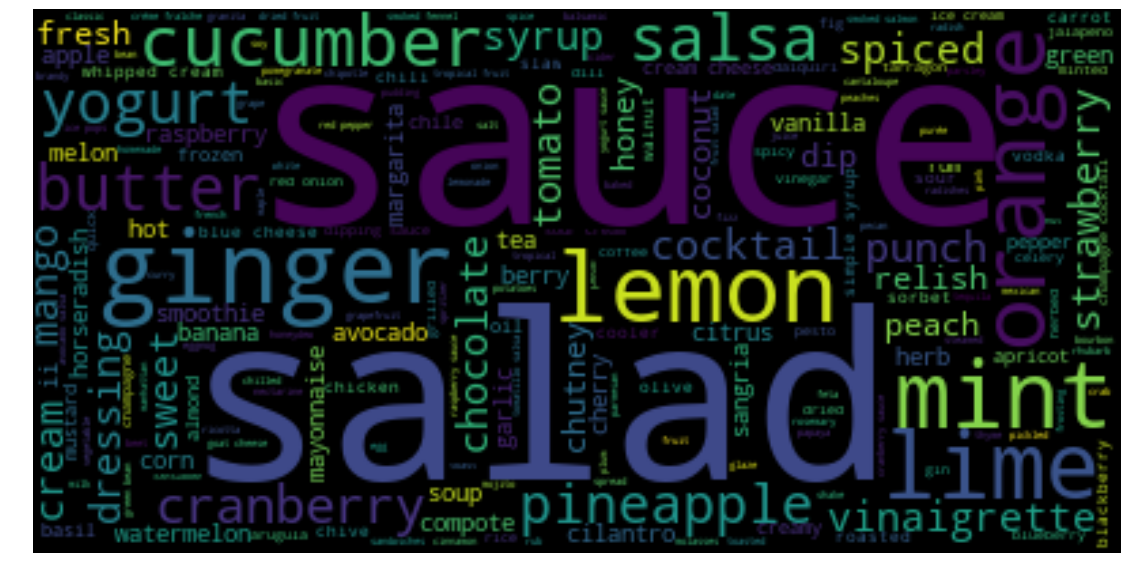

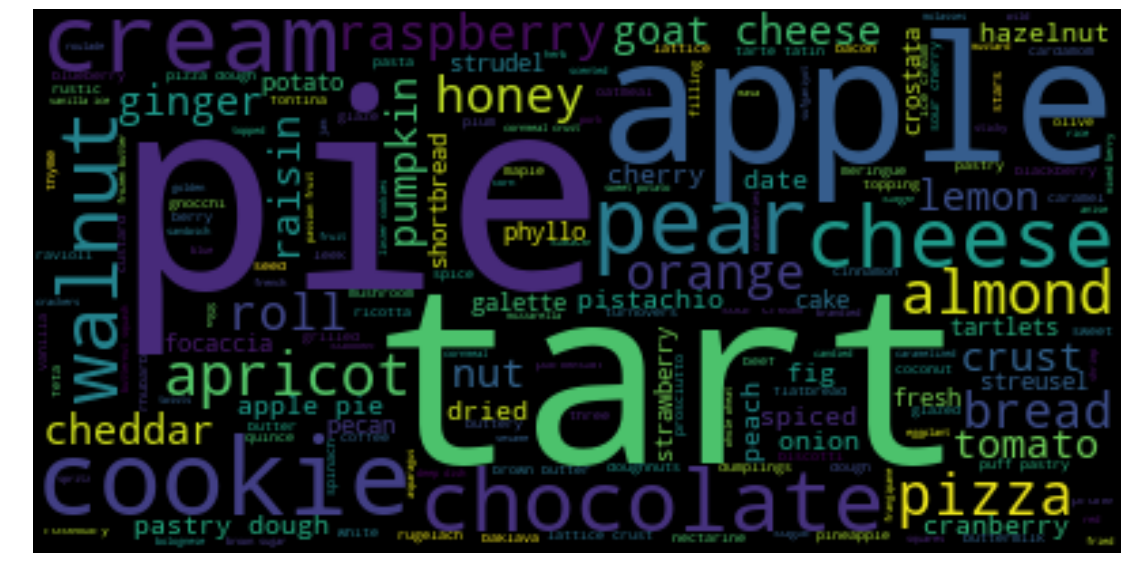

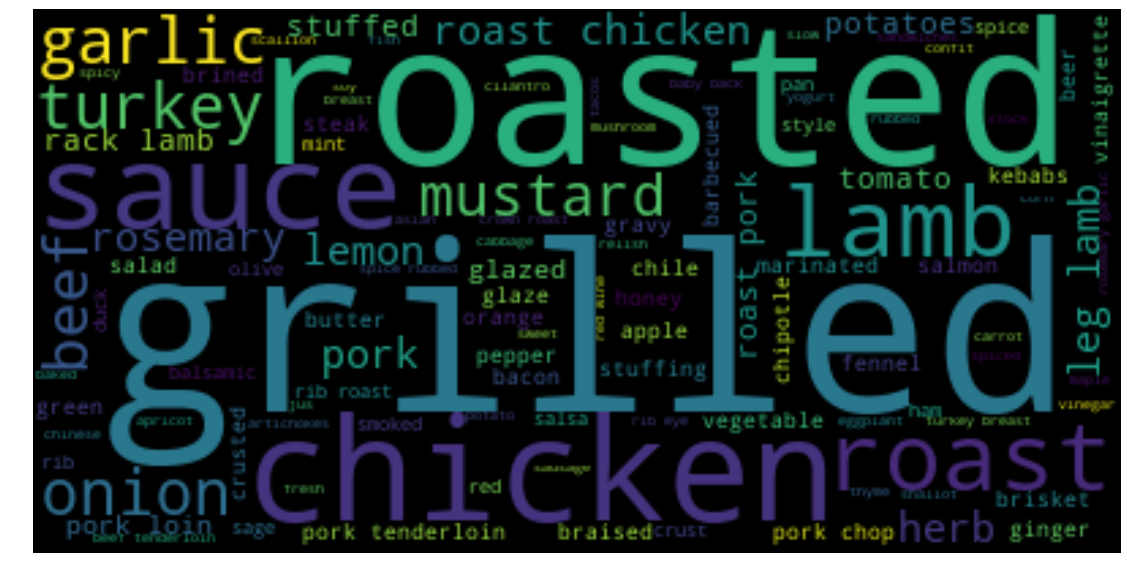

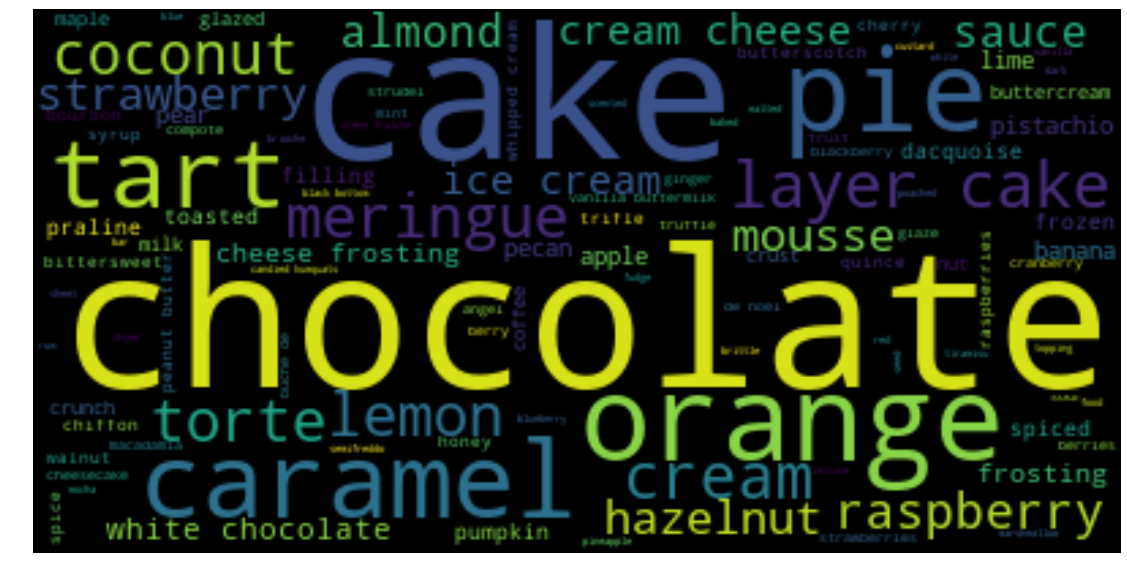

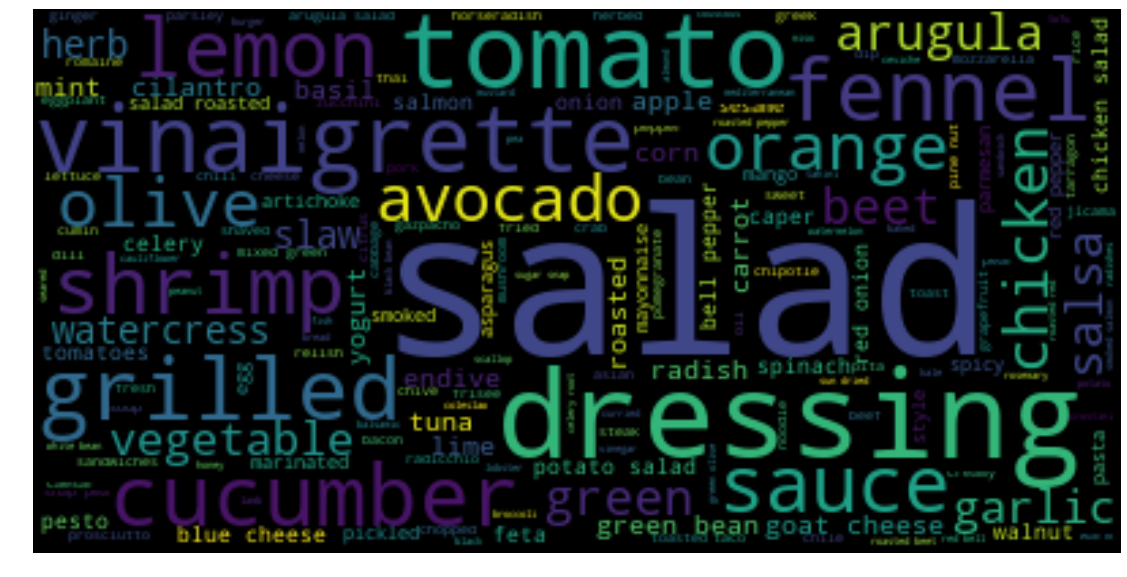

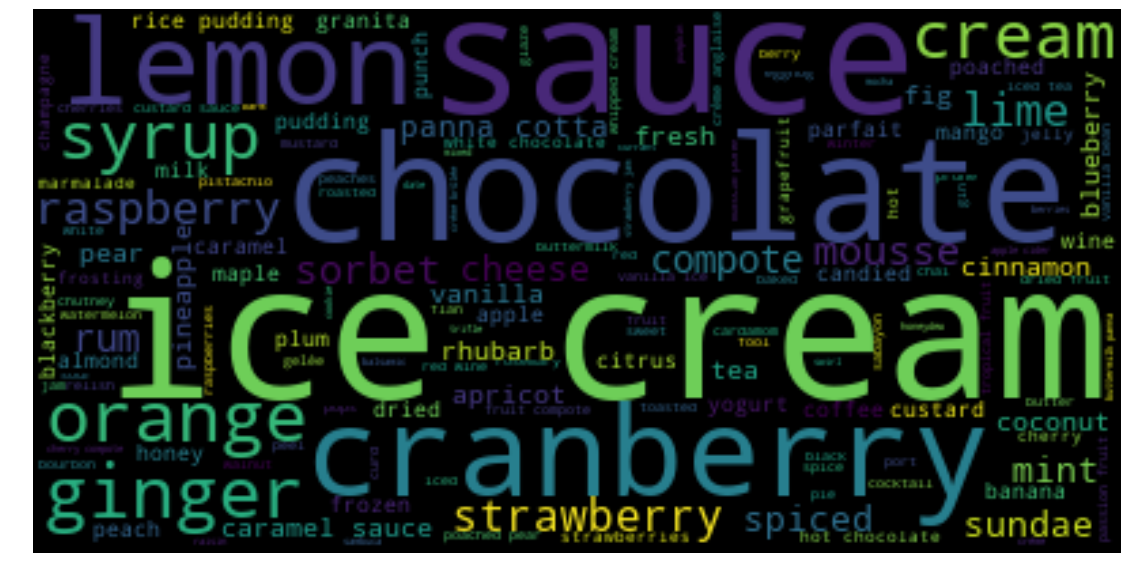

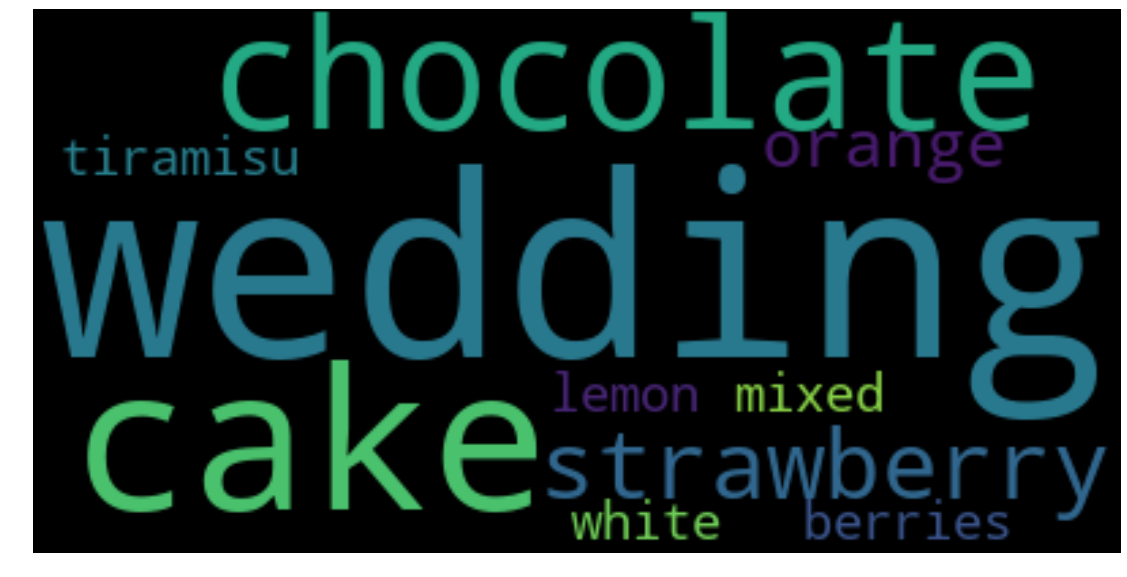

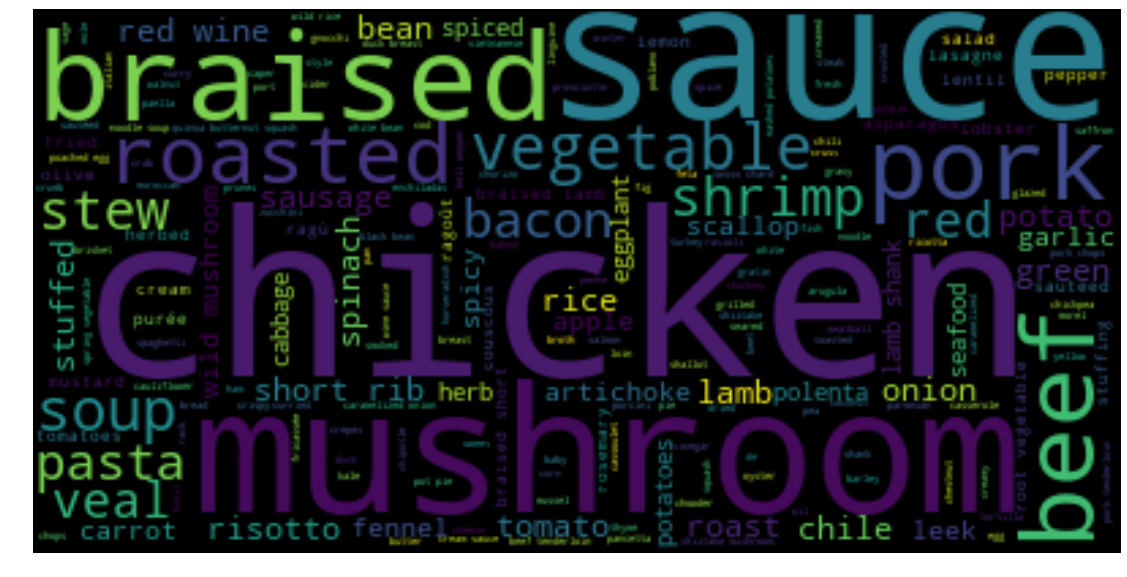

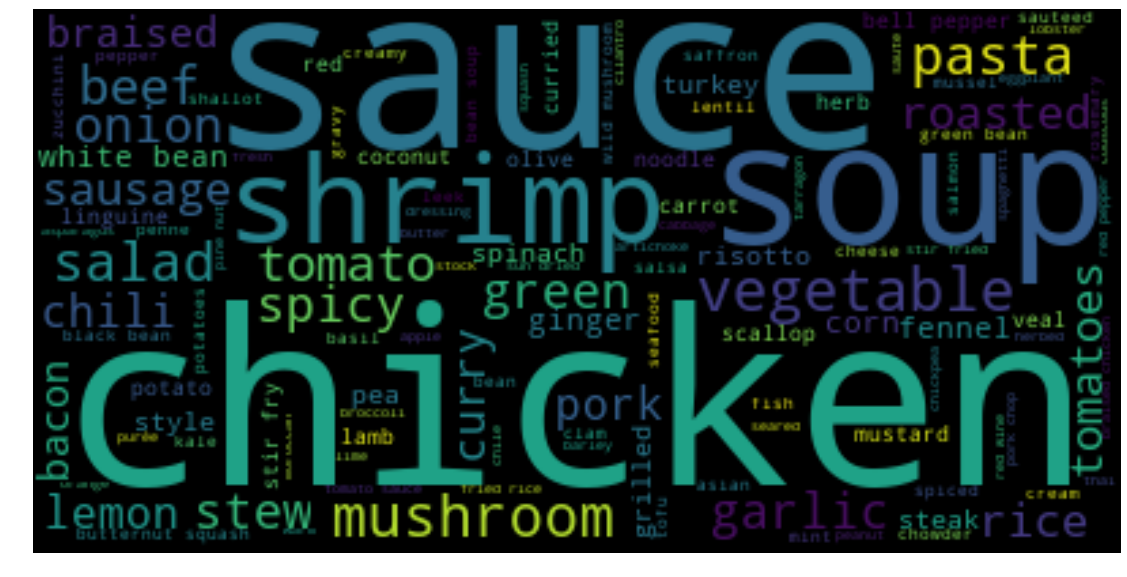

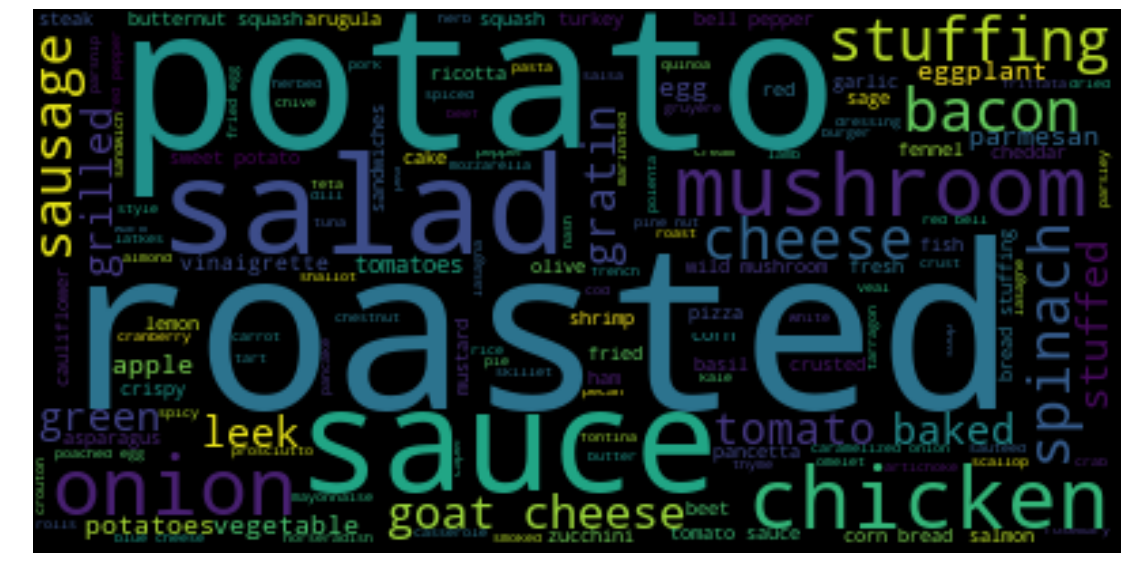

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [126]:
for x in range(0,99):
    word_clouder(x)
    

In [128]:
from sklearn.cluster import AgglomerativeClustering

In [130]:
agg_clust = AgglomerativeClustering(n_clusters=10)

assigned_clust = agg_clust.fit_predict(X)

In [134]:
def recipe_agg_clusterer(num):
    agg_clust = AgglomerativeClustering(n_clusters=num)
    
    y_hat= agg_clust.fit_predict(X)
    cluster_numbers=[]
    for number in range(len(y_hat)):
        cluster_numbers.append(y_hat[number])
    recipe['clustered_groups']=pd.DataFrame(cluster_numbers)
    return recipe

In [135]:
recipe_agg_clusterer(40)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


title  \
0                        Lentil, Apple, and Turkey Wrap    
1            Boudin Blanc Terrine with Red Onion Confit    
2                          Potato and Fennel Soup Hodge    
3                       Mahi-Mahi in Tomato Olive Sauce    
4                              Spinach Noodle Casserole    
5                                         The Best Blts    
6      Ham and Spring Vegetable Salad with Shallot Vi...   
7                                  Spicy-Sweet Kumquats    
8                                 Korean Marinated Beef    
9      Ham Persillade with Mustard Potato Salad and M...   
10         Yams Braised with Cream, Rosemary and Nutmeg    
11                                    Spicy Noodle Soup    
12     Banana-Chocolate Chip Cake With Peanut Butter ...   
13               Beef Tenderloin with Garlic and Brandy    
14                                        Peach Mustard    
15                            Raw Cream of Spinach Soup    
16                        Sweet Buttermilk Spoon Breads    
17                          Crisp Braised Pork Shoulder    
18     Mozzarella-Topped Peppers with Tomatoes and Ga...   
19     Tuna, Asparagus, and New Potato Salad with Chi...   
20     Asian Pear and Watercress Salad with Sesame Dr...   
21                                      "Fried" Chicken    
22     Fish Fillets in Parchment with Asparagus and O...   
23           Pancetta and Taleggio Lasagna with Treviso    
24                              Sea Salt-Roasted Pecans    
25                               Garlic Baguette Crumbs    
26                             Cucumber-Basil Egg Salad    
27                                    Dried Pear Crisps    
28     Green Bean, Red Onion, and Roast Potato Salad ...   
29                            Apricot-Cherry Shortcakes    
...                                                  ...   
20081                            Mussels in Cream Sauce    
20082  Roasted and Raw Carrot Salad with Avocado and ...   
20083                Cabbage Soup with Apples and Thyme    
20084           Goat Cheese-Onion Naan with Mango Salsa    
20085             Spinach with Chickpeas and Fried Eggs    
20086  Grilled Fillet of Beef with Tomato Ginger Vina...   
20087                         Roasted Red Pepper Butter    
20088                       White Miso Peach/Pear/Apple    
20089                  Lemon and Rosemary T-Bone Steaks    
20090                 3-Ingredient Caramel-Pear Galette    
20091                                 4-3-2-1 Spice Rub    
20092                                Saffron Mayonnaise    
20093  Potato Galettes with Crab, Shrimp, and Asparagus    
20094  Herbed Goat Cheese and Roasted-Vegetable Sandw...   
20095                               Maple Old-Fashioned    
20096                                           Russian    
20097                Shellfish Chowder with Fresh Thyme    
20098                                 Cauliflower Purée    
20099                     Bacon-Wrapped Maple Pork Loin    
20100                 Chicken with White Wine and Herbs    
20101                                        Date Purée    
20102  Crispy Salt and Pepper Chicken with Caramelize...   
20103                                       Orange-Tini    
20104                                 Blueberry Compote    
20105                       Chinese Barbecued Spareribs    
20106                                    Parmesan Puffs    
20107                    Artichoke and Parmesan Risotto    
20108                             Turkey Cream Puff Pie    
20109           Snapper on Angel Hair with Citrus Cream    
20110        Baked Ham with Marmalade-Horseradish Glaze    

                                           recipe_vector  clustered_groups  
0      [35.415123, -121.24619, -22.433096, -9.875012,...                 3  
1      [132.22688, -182.9189, -15.198818, 16.782574, ...                14  
2      [51.121754, -140.36613, 0.12203795, -1.9625912...                32  
3      [75.93198, -82.

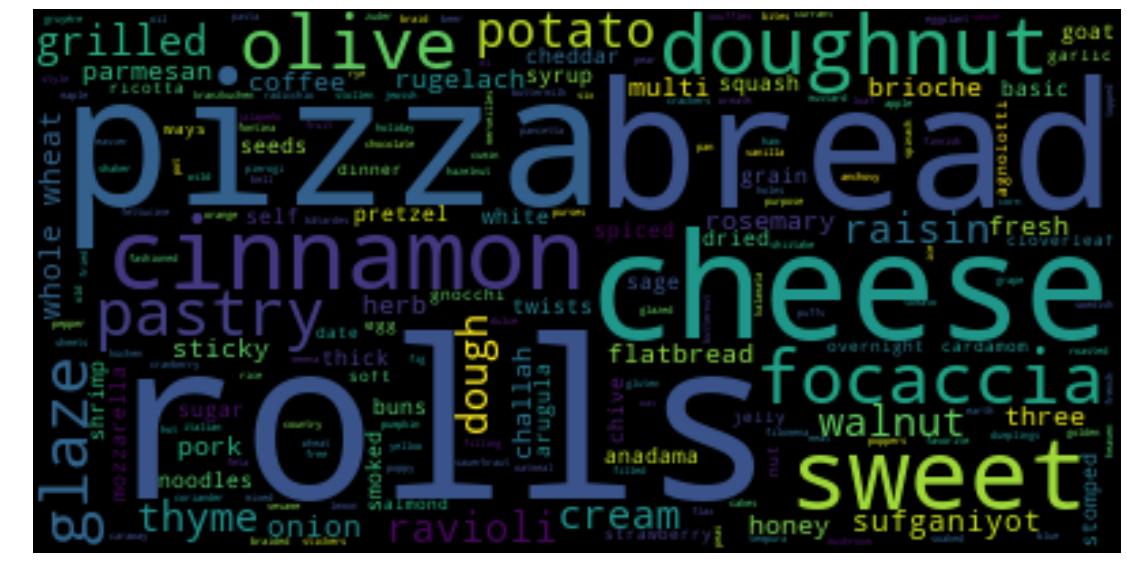

In [144]:
word_clouder(25)

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 100)
k_means.fit(X)
y_hat = k_means.predict(X)

In [ ]:
k_means.predict(dinner)

In [ ]:
food

In [ ]:
cluster_numbers=[]
for number in range(len(y_hat)):
    cluster_numbers.append(y_hat[number])

In [ ]:
recipe['clustered_groups']=pd.DataFrame(cluster_numbers)

In [ ]:
recipe[recipe['clustered_groups']==0]['title']

In [ ]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [ ]:
clusterer = KMeansClusterer(30, euclidean_distance,avoid_empty_clusters=True )
clusters = clusterer.cluster(X, True, trace=True)

In [ ]:
k_means_5 = KMeans(n_clusters=5).fit(X)
k_means_10 = KMeans(n_clusters=10).fit(X)
k_means_15 = KMeans(n_clusters=15).fit(X)
k_means_20 = KMeans(n_clusters=20).fit(X)
k_means_25 = KMeans(n_clusters=25).fit(X)

In [ ]:
k_list = [k_means_5,k_means_10,k_means_15,k_means_20,k_means_25,k_means]

In [ ]:
CH_score = []

for  model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabaz_score(X, labels))

In [ ]:
plt.plot([5, 10, 15, 20, 25,40], CH_score)
plt.xticks([5,10,15,20,25,40])
plt.title("Calinski Harabaz Scores for Different Values of K")
plt.ylabel("Variance Ratio")
plt.xlabel("K=")
plt.show()

In [ ]:
word_clouder(39)

In [ ]:
X_reduced_train.shape